## Extacting rar file

In [ ]:
!pip install pyunpack

In [ ]:
!pip install patool

## Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dot, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

## Loading Data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!gdown https://drive.google.com/uc?id=1xlE7BSlxU96tpJbOCBPwpEYUPaAqnXVO

Downloading...
From: https://drive.google.com/uc?id=1xlE7BSlxU96tpJbOCBPwpEYUPaAqnXVO
To: /content/cold_data.rar
100% 61.6M/61.6M [00:01<00:00, 52.3MB/s]


In [ ]:
from pyunpack import Archive
import os

if not os.path.exists("Data"):
    os.makedirs("Data")

Archive("cold_data.rar").extractall("Data")

In [ ]:


cold_3 = pd.read_csv("Data/cold_data_0.3.csv")
cold_7 = pd.read_csv("Data/cold_data_0.7.csv")
cold_1 = pd.read_csv("Data/cold_data_1.csv")
cold = pd.read_csv("Data/cold_data.csv")

In [ ]:
## Invesigating the shapes
print(f"Cold_data_0.3 shape : {cold_3.shape}")
print(f"Cold_data_0.7 shape : {cold_7.shape}")
print(f"Cold_data_1 shape : {cold_1.shape}")
print(f"Cold_data shape : {cold.shape}")

Cold_data_0.3 shape : (2706527, 20)
Cold_data_0.7 shape : (1263750, 20)
Cold_data_1 shape : (206629, 20)
Cold_data shape : (343305, 20)


#### since These are diffrent versions with diffrent cold rates for the data so i will proceed with 0.3 since it would be better to make the model find patterns

In [ ]:

data = cold_3.copy()



## Exploratory Data Analysis

In [ ]:

data.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,True,88.0,False,False,False,False
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,True,134.0,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706527 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             bool   
 15  read_time        float64
 16  share            bool   
 17  like             bool   
 18  follow           bool   
 19  favorite         bool   
dtypes: bool(5), float64(5), int64(10)
memory usage: 322.6 MB


In [ ]:

## checking For Nulls
data.isna().sum()

user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

In [ ]:
## checking For Duplicates
data.duplicated().sum()

113154

In [ ]:
## Dropping Duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
## finding the average number of interactions for each user
interaction_count = data.groupby("user_id")['user_id'].size().to_frame(name="Interactions count")
interaction_count
interaction_count.describe()

,Interactions count
user_id,
11,14
24,153
33,16
44,58
71,18
...,...
1000005,63
1000010,256
1000011,17


,Interactions count
count,68661.000000
mean,37.770685
std,58.710549
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,1386.000000


<Figure size 1600x800 with 0 Axes>

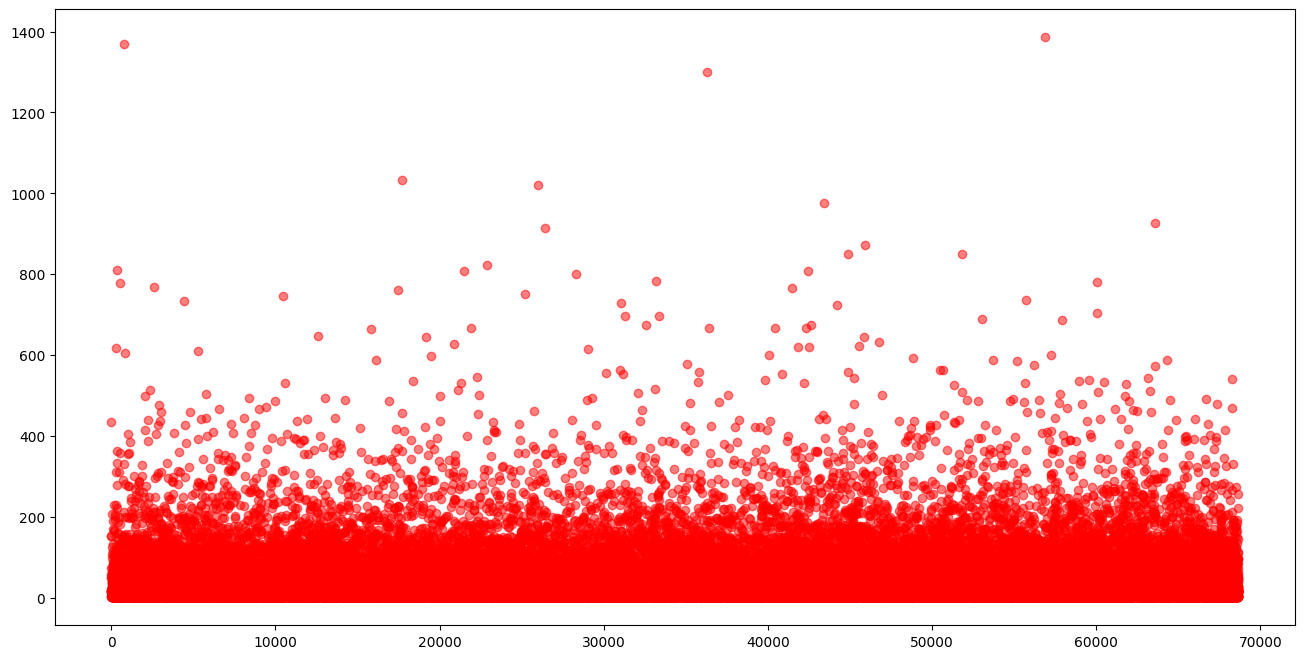

In [ ]:
## Finding the outlayers

count = interaction_count['Interactions count']
# Create a list of consecutive integers
integers = range(len(count))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,count, c='red', alpha = 0.5)


In [ ]:
interactions_not_skewed = interaction_count[interaction_count['Interactions count'] <500 ]
interactions_not_skewed
interactions_not_skewed.describe()


,Interactions count
user_id,
11,14
24,153
33,16
44,58
71,18
...,...
1000005,63
1000010,256
1000011,17


,Interactions count
count,68562.000000
mean,36.864736
std,53.284371
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,499.000000


In [ ]:

max_value = interactions_not_skewed['Interactions count'].max()
count_max_value = (interactions_not_skewed['Interactions count'] == max_value).sum()
max_value
print(count_max_value)

499

1


In [ ]:
interactions_not_skewed.describe()

,Interactions count
count,68562.000000
mean,36.864736
std,53.284371
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,499.000000


<Figure size 1600x800 with 0 Axes>

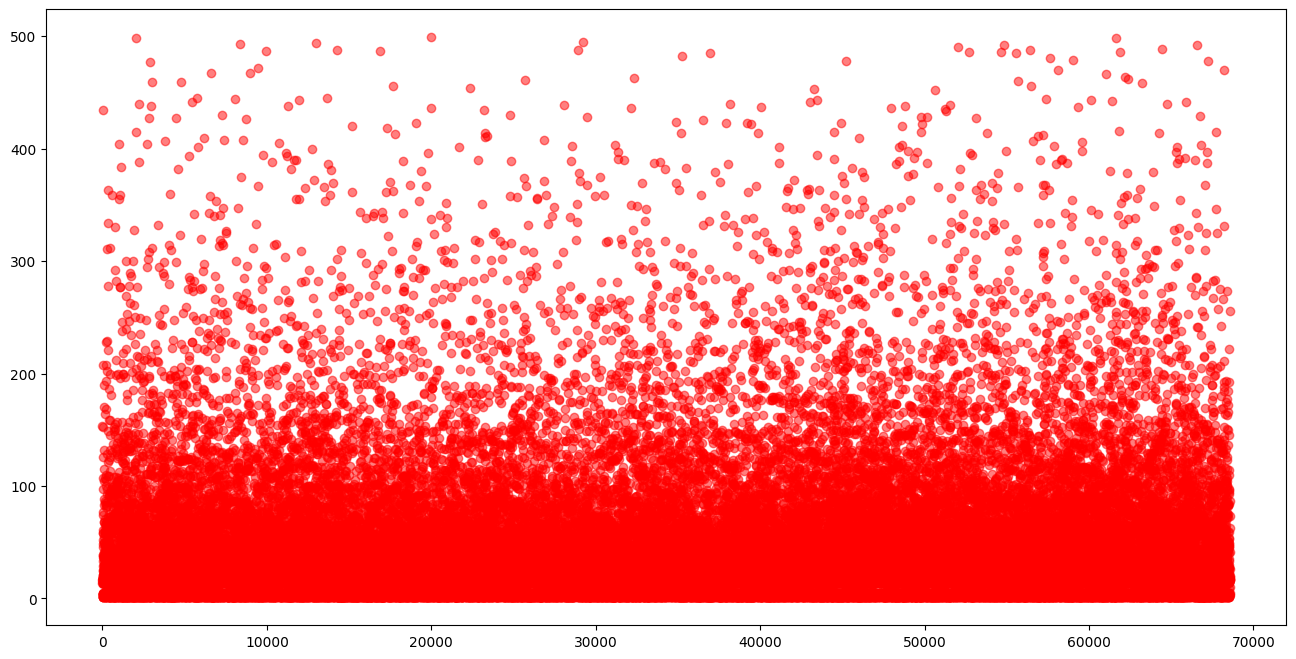

In [ ]:
## FInding the outlayers
count = interactions_not_skewed['Interactions count']
# Create a list of consecutive integers
integers = range(len(count))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,count, c='red', alpha = 0.5)

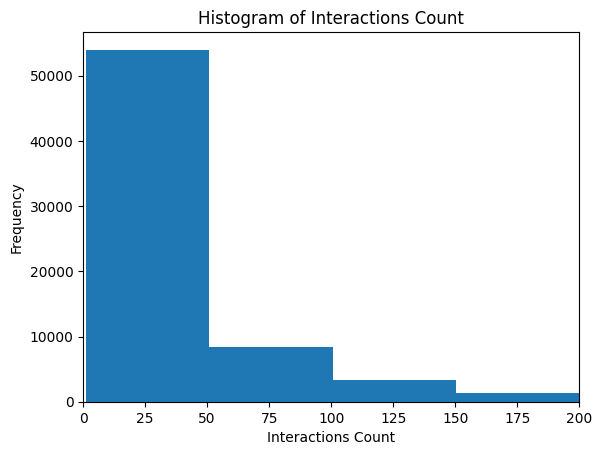

In [ ]:

# Create the histogram
plt.hist(interactions_not_skewed, bins=10)
plt.xlabel('Interactions Count')
plt.ylabel('Frequency')
plt.title('Histogram of Interactions Count')
plt.xlim(0,200)
plt.show();

### since the users that have a large number of interactions are not too many and most of users are in range from 1:500 so in order not to make the models baised towards the users with large count of interactions i would only keep the users that have an interaction coun from 1:500

In [ ]:
data.shape

(2593373, 20)

In [ ]:
users_selected = interactions_not_skewed.index
users_selected

Int64Index([     11,      24,      33,      44,      71,     114,     139,
                149,     161,     184,
            ...
             999976,  999982,  999990,  999996, 1000003, 1000005, 1000010,
            1000011, 1000013, 1000015],
           dtype='int64', name='user_id', length=68562)

In [ ]:
# Create a subset of only for the users that has interactions count between 5:500
selected_data = data[data["user_id"].isin(users_selected)]
selected_data
selected_data.shape

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,True,88.0,False,False,False,False
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,True,134.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706522,262140,79157,1.0,1,2,12201,42,22,111.0,3,3.0,10408,104,7.0,True,46.0,False,False,False,False
2706523,786430,152946,1.0,2,2,5705,156,21,68.0,3,3.0,10901,109,1.0,True,58.0,False,False,False,False
2706524,786430,36745,1.0,2,2,5323,14,68,46.0,2,3.0,12005,120,1.0,True,67.0,False,False,False,False
2706525,786430,180675,1.0,2,2,8339,404,28,59.0,3,3.0,13201,132,3.0,True,94.0,False,False,False,False


(2527520, 20)

## Data preprocessing

### Encoding the Features

In [ ]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527520 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             bool   
 15  read_time        float64
 16  share            bool   
 17  like             bool   
 18  follow           bool   
 19  favorite         bool   
dtypes: bool(5), float64(5), int64(10)
memory usage: 320.6 MB


* i will encode boolean features

In [ ]:
def encode_bool_columns(df, cols):
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in cols:
        if df_encoded[col].dtype == bool:
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(int))
    return df_encoded

In [ ]:
# cat_columns
cat_cols = ['read', 'share', 'like', 'follow', 'favorite']

In [ ]:
# Encode the categorical columns in the DataFrame
data_encoded = encode_bool_columns(selected_data, cat_cols)

data_encoded

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,1,4.0,0,0,0,0
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,1,19.0,0,0,0,0
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,1,104.0,0,0,0,0
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,1,88.0,0,0,0,0
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,1,134.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706522,262140,79157,1.0,1,2,12201,42,22,111.0,3,3.0,10408,104,7.0,1,46.0,0,0,0,0
2706523,786430,152946,1.0,2,2,5705,156,21,68.0,3,3.0,10901,109,1.0,1,58.0,0,0,0,0
2706524,786430,36745,1.0,2,2,5323,14,68,46.0,2,3.0,12005,120,1.0,1,67.0,0,0,0,0
2706525,786430,180675,1.0,2,2,8339,404,28,59.0,3,3.0,13201,132,3.0,1,94.0,0,0,0,0


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527520 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             int64  
 15  read_time        float64
 16  share            int64  
 17  like             int64  
 18  follow           int64  
 19  favorite         int64  
dtypes: float64(5), int64(15)
memory usage: 405.0 MB


## feature engineering :

* avg_rating : since there is a 3 scores for each item i managed to get the averge among them and not to rely only on one score inorder to get more accurate recommendations.

In [ ]:

data_encoded['item_score1'].value_counts()

3    1238150
4     698415
2     567607
1      13148
0      10199
5          1
Name: item_score1, dtype: int64

In [ ]:
data_encoded['item_score2'].value_counts()

3.0    2453981
7.0      21309
6.0      17832
5.0       9890
8.0       8768
0.0       6963
9.0       5747
4.0       2788
2.0        212
1.0         30
Name: item_score2, dtype: int64

In [ ]:
data_encoded['item_score3'].value_counts()

5.0      499754
6.0      494601
1.0      348955
4.0      339621
7.0      316054
3.0      208945
2.0      153248
8.0      127171
0.0       27732
9.0       10880
255.0       559
Name: item_score3, dtype: int64

In [ ]:
## since 255 rating is considred outlier so i will drop it from the data
data_encoded = data_encoded[data_encoded['item_score3']!=255.0]

In [ ]:
data_encoded['item_score3'].value_counts()

5.0    499754
6.0    494601
1.0    348955
4.0    339621
7.0    316054
3.0    208945
2.0    153248
8.0    127171
0.0     27732
9.0     10880
Name: item_score3, dtype: int64

In [ ]:
# making average item ratings
data_encoded['avg_rating'] = np.rint((data_encoded['item_score1']+
                                      data_encoded['item_score2']+
                                      data_encoded['item_score3']) /3)

<ipython-input-36-3d178c72c82a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded['avg_rating'] = np.rint((data_encoded['item_score1']+data_encoded['item_score2']+data_encoded['item_score3']) /3)


In [ ]:
data_encoded['avg_rating'].value_counts()

4.0    1201729
3.0     747580
2.0     325180
5.0     230015
6.0      14533
0.0       6962
1.0        708
7.0        254
Name: avg_rating, dtype: int64

## Recommender System

#### get_similar_items

* This function takes item_id as an input and returns a list of 10 similar items based on their content features
<br>

* The function then uses the kneighbors() method of the KNN model to find the 10 nearest neighbors
<br>


In [ ]:
# a function to get similar items based on content
def get_similar_items(item_id):
    item_features = data_encoded[data_encoded['item_id'] == item_id][['category_second', 'category_first',
                                                                      'item_score1','item_score2', 'item_score3']].iloc[0].values.reshape(1, -1)
    knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
    knn_model.fit(data_encoded[['category_second', 'category_first',
                                'item_score1', 'item_score2', 'item_score3']])

    distances, indices = knn_model.kneighbors(item_features, n_neighbors=10)
    similar_items = data_encoded.iloc[indices[0]]['item_id'].tolist()
    return similar_items


In [ ]:
get_similar_items(73342)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[163298, 188537, 162710, 79587, 161911, 161911, 163298, 161911, 148051, 79587]

In [ ]:
data_encoded.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,...,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite,avg_rating
0,393219,73342,1.0,2,2,73,1,0,25.0,3,...,12000,120,1.0,1,4.0,0,0,0,0,2.0
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,...,11204,112,2.0,1,19.0,0,0,0,0,3.0
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,...,10203,102,6.0,1,104.0,0,0,0,0,6.0
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,...,11012,110,6.0,1,88.0,0,0,0,0,4.0
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,...,11202,112,2.0,1,134.0,0,0,0,0,3.0


#### get_similar_users

* This function finds similar users based on their rating behavior using collaborative filtering. It takes in a user_id and returns a list of similar users sorted in descending order according *to* their similarity score.


In [ ]:
# a function to get similar users based on collaborative filtering
def get_similar_users(user_id):
    user_ratings = data_encoded[data_encoded['user_id'] == user_id].set_index('item_id')['avg_rating']
    similar_users = data_encoded[data_encoded['item_id'].isin(user_ratings.index) & (data_encoded['user_id'] != user_id)].groupby('user_id')['item_id'].apply(set).apply(list)
    similar_users = similar_users.to_frame().reset_index()
    similar_users['similarity'] = similar_users['item_id'].apply(lambda x: len(set(x) & set(user_ratings.index))/len(set(x) | set(user_ratings.index)))
    similar_users = similar_users[similar_users['similarity'] > 0].sort_values('similarity', ascending=False)['user_id'].tolist()
    return similar_users


In [ ]:
get_similar_users(393219)

#### get_items_rated_by_similar_users

* This function returns a list of users who have rated at least one item in common with the input user_id, sorted in descending order of similarity based on the Jaccard similarity between the items they have rated and the items rated by the input user.


In [ ]:

# Define a function to get items rated by similar users
def get_items_rated_by_similar_users(user_id, similar_users):
    items_rated_by_similar_users = data_encoded[data_encoded['user_id'].isin(similar_users)]['item_id'].unique()
    items_rated_by_user = data_encoded[data_encoded['user_id'] == user_id]['item_id'].unique()
    items_rated = np.setdiff1d(items_rated_by_similar_users, items_rated_by_user)
    return items_rated

In [ ]:
# Define the neural network model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the model on the training set
def train_model(X_train, y_train, model):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
    model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stop])
    return model

#### get_recommendations

* This function returns a list of the top-k recommended items for the input user_id based on their predicted ratings, using a combination of collaborative filtering and content-based filtering approaches.
<br>

* The function takes as input the user_id, the training set X_train and y_train, the recommendation model model, and the number of recommendations k (default 10).
<br>

* Selects the user's ratings and items rated from the X_test DataFrame.
<br>

* Uses content-based filtering to find similar items if the user has less than 5 ratings based on the get_similar_items() function.If there are no similar items found, the function returns the top-10 most popular items in the training set based on the number of ratings.
<br>

* Uses collaborative filtering to find similar users and predict the ratings of unrated items using an ANN approach if the user has more than 5 ratings.
<br>


* Returns the top-k recommended items based on the predicted ratings.
<br>



* The function then selects the top-k recommended items based on the predicted ratings and returns them as a list.




In [ ]:
# Get the recommendations for a user using the trained model
def get_recommendations(user_id, X_train, y_train, model, k=10):
    # Get the user's ratings and items rated
    user_ratings = X_test[X_test['user_id'] == user_id]['avg_rating']
    items_rated = X_test[X_test['user_id'] == user_id]['item_id'].unique()

    # If the user has no or few ratings, use content-based filtering to find similar items
    if len(user_ratings) < 5:
        similar_items = []
        for item_id in items_rated:
            similar_items.extend(get_similar_items(item_id))
        similar_items = list(set(similar_items))
        if len(similar_items) == 0:
            return X_train['item_id'].value_counts().sort_values(ascending=False).head(10).index.tolist()
    else:
        # If the user has more than 5 ratings, use the KNN approach to find similar users based on the ratings
        similar_users = get_similar_users(user_id)
        if len(similar_users) == 0:
            # If there are no similar users based on ratings, use content-based filtering to find similar items
            similar_items = []
            for item_id in items_rated:
                similar_items.extend(get_similar_items(item_id))
            similar_items = list(set(similar_items))
            if len(similar_items) == 0:
                return X_train['item_id'].value_counts().sort_values(ascending=False).head(10).index.tolist()
        else:
            # If there are similar users based on ratings, use the ANN approach to predict the ratings of unrated items
            items_rated_by_similar_users = get_items_rated_by_similar_users(user_id, similar_users)
            if len(items_rated_by_similar_users) == 0:
                return X_train['item_id'].value_counts().sort_values(ascending=False).head(10).index.tolist()
            X_train_ann = X_train[(X_train['user_id'].isin(similar_users)) & (X_train['item_id'].isin(items_rated_by_similar_users)) & (~X_train.index.isin(user_ratings.index))]
            y_train_ann = y_train.loc[X_train_ann.index]
            # Train the model on the training set
            model.fit(X_train_ann, y_train_ann)
            # Make predictions for unrated items and return the top-k recommendations
            items_unrated = np.setdiff1d(X_train['item_id'].unique(), items_rated)
            X_pred = X_train[X_train['item_id'].isin(items_unrated)]
            y_pred = model.predict(X_pred)
            y_pred = y_pred.reshape(len(y_pred))
            # Filter out any unrated items that were not passed to the model for prediction
            items_to_recommend = np.intersect1d(items_unrated, X_pred['item_id'].unique())
            X_pred_filtered = X_pred[X_pred['item_id'].isin(items_to_recommend)]
            y_pred_filtered = y_pred[X_pred['item_id'].isin(items_to_recommend)]
            # Create the recommended items DataFrame
            recommended_items = pd.DataFrame({'item_id': X_pred_filtered['item_id'], 'rating': y_pred_filtered})
            # Filter out invalid predictions (i.e., NaN values)
            recommended_items = recommended_items.dropna()
            # Sort the items by their predicted ratings and return the top-k recommendations
            recommended_items = recommended_items.sort_values(by='rating', ascending=False).head(k)
            recommended_items = recommended_items['item_id'].tolist()
            return recommended_items

    return similar_items


In [ ]:
# Get recommendations for a user
user_id = 262140
recommendations = get_recommendations(user_id)
print(recommendations)

Epoch 1/20
4335/4335 [==============================] - 8s 2ms/step - loss: 19027064.0000 - val_loss: 7904.9697
Epoch 2/20
4335/4335 [==============================] - 7s 2ms/step - loss: 16158.3535 - val_loss: 16117.6328
Epoch 3/20
4335/4335 [==============================] - 7s 2ms/step - loss: 25518.9648 - val_loss: 21552.8594
Epoch 4/20
4335/4335 [==============================] - 6s 1ms/step - loss: 20303.4785 - val_loss: 8634.3730
Epoch 5/20
4335/4335 [==============================] - 7s 2ms/step - loss: 18001.3125 - val_loss: 1153.6028
Epoch 6/20
4335/4335 [==============================] - 7s 2ms/step - loss: 15965.1104 - val_loss: 1044.6086
Epoch 7/20
4335/4335 [==============================] - 7s 2ms/step - loss: 13107.3291 - val_loss: 674.9314
Epoch 8/20
4335/4335 [==============================] - 6s 1ms/step - loss: 10407.0693 - val_loss: 12237.7725
Epoch 9/20
4335/4335 [==============================] - 7s 2ms/step - loss: 8297.6328 - val_loss: 155.9548
Epoch 10/20
4335

## Training and Evalualting the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score

In [ ]:
# Split the data into training and test sets
X_train,X_test, y_train, y_test = train_test_split(data_encoded[['user_id', 'item_id', 'category_second', 'category_first', 'item_score1', 'item_score2', 'item_score3', 'avg_rating']], data_encoded['avg_rating'], test_size=0.2, random_state=42)


In [ ]:
# Define the input shape of the model
input_shape = (X_train.shape[1],)

# Create the model and train it on the training set
model = create_model(input_shape)
model = train_model(X_train, y_train, model)

Epoch 1/20
25270/25270 [==============================] - 40s 2ms/step - loss: 2142343.2500 - val_loss: 272419.5625
Epoch 2/20
25270/25270 [==============================] - 51s 2ms/step - loss: 49593.9961 - val_loss: 5594.1108
Epoch 3/20
25270/25270 [==============================] - 39s 2ms/step - loss: 34455.8867 - val_loss: 246.2370
Epoch 4/20
25270/25270 [==============================] - 39s 2ms/step - loss: 24529.1816 - val_loss: 616.6179
Epoch 5/20
25270/25270 [==============================] - 40s 2ms/step - loss: 12208.4180 - val_loss: 252.0182
Epoch 6/20
25270/25270 [==============================] - 39s 2ms/step - loss: 5863.1919 - val_loss: 7.8872
Epoch 7/20
25270/25270 [==============================] - 39s 2ms/step - loss: 4177.3696 - val_loss: 62.0565
Epoch 8/20
25270/25270 [==============================] - 39s 2ms/step - loss: 1781.0865 - val_loss: 2705.9790
Epoch 9/20
25270/25270 [==============================] - 39s 2ms/step - loss: 1002.1809 - val_loss: 72.0861
Ep

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
y_pred = np.round(y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}, Recall: {recall}, MSE: {mse}')

15794/15794 [==============================] - 16s 988us/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.22588508791032177, Recall: 0.4752736978945098, MSE: 0.760424511558467


In [ ]:
# Get recommendations for a user using the trained model
user_id = 12333
recommendations = get_recommendations(user_id, X_train, y_train, X_test, model)
print(f'Recommended items for user {user_id}: {recommendations}')

Recommended items for user 12333: [178939, 178841, 145430, 145561, 162009, 162007, 145522, 195380, 195396, 178777]


#### evaluate_recommendations

* Overall this function evaluates the quality of the recommended items by computing precision, recall, and F1 score. It takes in a dictionary of recommended items, the training set X_train, and the test set X_test, and returns the average precision, recall, and F1 score across all users in the test set as a tuple.
<br>

* For each unique user in the test set:
    * Checks if the user id exists in the recommended items dictionary.

    * Gets the actual items rated by the user in the test set.

    * Gets the recommended items for the user.

    * Computes the number of recommended items that are relevant (i.e., in the test set).
    
    * Computes precision, recall, and F1 score based on the number of relevant items, the number of recommended items, and the number of actual items.


#### I tested the model evaluation on 10 users only since the kernel crashed after generating recommendations for more than 10

In [ ]:
def evaluate_recommendations(recommended_items, X_train, X_test):
    # Initialize variables
    precision = []
    recall = []
    f1 = []
    num_users = len(X_test['user_id'].unique())

    for user_id in X_test['user_id'].unique():
        # Check if the user id exists in the recommended_items dictionary
        if user_id not in recommended_items:
            continue
        # Get the actual items rated by the user in the test set
        actual_items = X_test[X_test['user_id'] == user_id]['item_id'].values
        # Get the recommended items for the user
        recommended = recommended_items[user_id]
        # Compute the number of recommended items that are relevant (i.e., in the test set)
        num_relevant = len(np.intersect1d(actual_items, recommended))
        # Compute precision, recall, and F1 score
        if len(actual_items) > 0:
            precision.append(num_relevant / len(recommended) if len(recommended) > 0 else 0)
            recall.append(num_relevant / len(actual_items) if len(actual_items) > 0 else 0)
            f1.append(2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1]) if precision[-1] + recall[-1] > 0 else np.nan)
        else:
            precision.append(0)
            recall.append(0)
            f1.append(0)

    # Compute the average precision, recall, and F1 score across all users
    precision_avg = np.nanmean(precision)
    recall_avg = np.nanmean(recall)
    f1_avg = np.nanmean(f1)

    return precision_avg, recall_avg, f1_avg

In [ ]:
recommended_items = {}
for i, user_id in enumerate(X_test['user_id'].unique()[:10]):
    recommended_items[user_id] = get_recommendations(user_id, X_train, y_train, model)
    print(f"Iteration {i+1}/{len(X_test['user_id'].unique()[:10])}: Recommended items for user {user_id}")



63122/63122 [==============================] - 62s 989us/step
Iteration 1/10: Recommended items for user 296146
63106/63106 [==============================] - 64s 1ms/step
Iteration 2/10: Recommended items for user 905261
62985/62985 [==============================] - 64s 1ms/step
Iteration 3/10: Recommended items for user 432045
62978/62978 [==============================] - 65s 1ms/step
Iteration 4/10: Recommended items for user 631266
63055/63055 [==============================] - 62s 990us/step
Iteration 5/10: Recommended items for user 797167
63090/63090 [==============================] - 62s 978us/step
Iteration 6/10: Recommended items for user 315941


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Iteration 7/10: Recommended items for user 195859
63053/63053 [==============================] - 61s 974us/step
Iteration 8/10: Recommended items for user 9335
63126/63126 [==============================] - 62s 974us/step
Iteration 9/10: Recommended items for user 847237
62947/62947 [==============================] - 65s 1ms/step
Iteration 10/10: Recommended items for user 937778


ZeroDivisionError: ignored

In [ ]:
recommended_items

{296146: [9257,
  178780,
  185464,
  19246,
  195618,
  23003,
  7781,
  178818,
  139166,
  195447],
 905261: [9257,
  80220,
  195577,
  10270,
  19298,
  19751,
  145534,
  163598,
  178843,
  25244],
 432045: [9257,
  142824,
  46931,
  73235,
  213136,
  105852,
  140992,
  12179,
  33309,
  162025],
 631266: [9257,
  106050,
  140815,
  147023,
  121884,
  155886,
  208206,
  19186,
  162192,
  146158],
 797167: [9257,
  7387,
  199228,
  9373,
  180973,
  179053,
  180258,
  20082,
  32388,
  14463],
 315941: [9257,
  164303,
  195525,
  212835,
  141176,
  195492,
  8549,
  125067,
  18212,
  179754],
 195859: [67746,
  179561,
  27501,
  161966,
  41742,
  162193,
  79954,
  36437,
  197270,
  15094,
  161950],
 9335: [9257, 7540, 80220, 82949, 195577, 10270, 19298, 19751, 145534, 163598],
 847237: [9257,
  9373,
  179053,
  180258,
  20082,
  32388,
  14463,
  30968,
  195927,
  213318],
 937778: [9257,
  12234,
  179317,
  97728,
  80436,
  141071,
  139003,
  7540,
  40329

In [ ]:
# Evaluate the recommendations using precision, recall, and F1 score
precision, recall, f1 = evaluate_recommendations(recommended_items, X_train, X_test)

# Print the results
print(f"Precision: {float(precision):.4f}, Recall: {float(recall):.4f}, F1: {float(f1):.4f}")

Precision: 0.0182, Recall: 0.0667, F1: 0.2857


In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

testset = pd.concat([X_test.drop('avg_rating', axis=1), y_test], axis=1)

def calculate_log_odds(predictions):
    probs = np.mean(predictions)
    odds = probs / (1 - probs)
    log_odds = np.log(odds)
    return log_odds

# Function to calculate bias metrics for each age and gender group
def calculate_bias_metrics(testset, typeData):
    bias_metrics = {}
    gender_groups = testset.groupby(typeData)
    for gender in testset[typeData].unique():
      data = gender_groups.get_group(gender)
    # Filter predictions and labels based on age and gender categories
      prediction = model.predict(data[['user_id', 'item_id', 'category_second', 'category_first', 'item_score1', 'item_score2', 'item_score3', 'avg_rating', 'age', 'gender']])
      # accuracy = accuracy_score(prediction, data['avg_rating'])
      precision, recall, f1= evaluate_recommendations(recommended_items, X_train, data[['user_id', 'item_id', 'category_second', 'category_first', 'item_score1', 'item_score2', 'item_score3', 'avg_rating', 'age', 'gender']])
      log_odds = calculate_log_odds(prediction)

      bias_metrics[('all', gender)] = {
          'Precision': precision,
          'Recall': recall,
          'F1 Score': f1,
          'Log Odds': log_odds
      }

      print(" ", typeData," ", gender,
          '\n Precision: ', precision,
          'Recall: ', recall,
          'F1 Score: ', f1,
          'Log Odds: ', log_odds)

    return bias_metrics

# Calculate the bias metrics for the model

bias_metrics_model_gender = calculate_bias_metrics(testset, 'gender')
bias_metrics_model_age = calculate_bias_metrics(testset, 'age')

4940/4940 [==============================] - 8s 2ms/step
  gender   2 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
   37/10825 [..............................] - ETA: 15s 

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


10825/10825 [==============================] - 20s 2ms/step
  gender   1 Precision:  0.022727272727272728 Recall:  0.08333333333333333 F1 Score:  0.28571428571428575 Log Odds:  nan
31/31 [==============================] - 0s 1ms/step


<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)
<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


  gender   0 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
1573/1573 [==============================] - 2s 1ms/step
  age   4 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
  79/3507 [..............................] - ETA: 4s

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


3507/3507 [==============================] - 5s 1ms/step
  age   3 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
  40/7533 [..............................] - ETA: 9s  

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


7533/7533 [==============================] - 11s 1ms/step
  age   2 Precision:  0.06060606060606061 Recall:  0.2222222222222222 F1 Score:  0.28571428571428575 Log Odds:  nan
 75/871 [=>............................] - ETA: 1s

<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


871/871 [==============================] - 1s 1ms/step
  age   5 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
 80/123 [==================>...........] - ETA: 0s

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


123/123 [==============================] - 0s 1ms/step
  age   7 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
  75/1533 [>.............................] - ETA: 1s

<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


1533/1533 [==============================] - 2s 1ms/step
  age   1 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
 77/614 [==>...........................] - ETA: 0s

<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


614/614 [==============================] - 1s 1ms/step
  age   6 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
44/44 [==============================] - 0s 1ms/step
  age   0 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan


<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)
<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)
